In [1]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [2]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")
validation_generator = test_datagen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [3]:
model = Sequential()

model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
model.add(Flatten())

In [4]:
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
res=model.fit_generator(
		trainGenerator,
		epochs = 25,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432
		)


C:\Users\M\AppData\Local\Temp\ipykernel_22888\1035941781.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res=model.fit_generator(


Epoch 1/25


2444/2444 [==============================] - 661s 268ms/step - loss: 0.8213 - accuracy: 0.7696 - val_loss: 0.2928 - val_accuracy: 0.9043
Epoch 2/25
2444/2444 [==============================] - 108s 44ms/step - loss: 0.2937 - accuracy: 0.9092 - val_loss: 0.1424 - val_accuracy: 0.9550
Epoch 3/25
2444/2444 [==============================] - 105s 43ms/step - loss: 0.2263 - accuracy: 0.9296 - val_loss: 0.2358 - val_accuracy: 0.9242
Epoch 4/25
2444/2444 [==============================] - 113s 46ms/step - loss: 0.1900 - accuracy: 0.9404 - val_loss: 0.0997 - val_accuracy: 0.9691
Epoch 5/25
2444/2444 [==============================] - 106s 44ms/step - loss: 0.1723 - accuracy: 0.9465 - val_loss: 0.1458 - val_accuracy: 0.9540
Epoch 6/25
2444/2444 [==============================] - 114s 46ms/step - loss: 0.1587 - accuracy: 0.9508 - val_loss: 0.0678 - val_accuracy: 0.9816
Epoch 7/25
2444/2444 [==============================] - 110s 45ms/step - loss: 0.1440 - accuracy: 0.9549 - val_loss

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 32)        128       
 chNormalization)                                                
                                                        

In [6]:
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

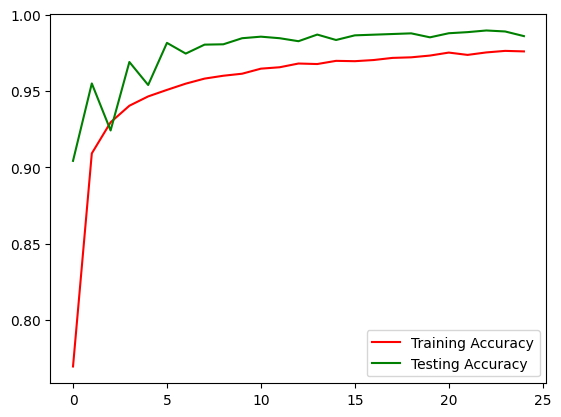

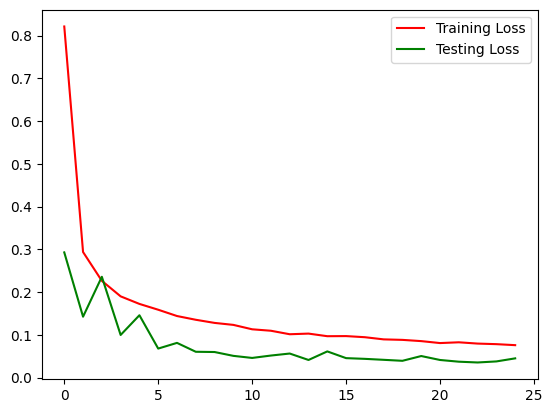

In [7]:

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [8]:
model.save("HindiModel2.h5")

C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


: 